### 01.Download all the required libs using requirements.txt

In [1]:
!pip install -r requirements.txt -q

### 02.Import Dependencies

In [31]:
import os
from enum import Enum
import pandas as pd #alias
import openai, groq
import numpy as np  #alias
import seaborn as sns
from pydantic import BaseModel
from dotenv import load_dotenv

### 03.Basic Information from my data set

In [32]:
os.getcwd() #get current working directory

'c:\\Users\\Tenura Pinsara\\Desktop\\ML\\Zuu\\mini_p_00\\Advanced_Telco_Customer_Churn_Prediction\\data'

In [33]:
df = pd.read_csv('c:\\Users\\Tenura Pinsara\\Desktop\\ML\\Zuu\\mini_p_00\\Advanced_Telco_Customer_Churn_Prediction\\data\\row\\Telco-Customer-Churn.CSV')

In [34]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
print(f"No of Rows : {len(df)}")

No of Rows : 7043


In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### This data set not have missing values 

In [37]:
df = df.drop(
    columns = ['customerID']
)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

special thing note when try to find outliers. this data set "TotalCharges" column is not integer <br>
I convert it integer format then i found dataset have 11 missing values. <br>
Now have to handdle that missing values 

In [39]:
# TotalCharges column convert to integer format
df['TotalCharges'] = df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [40]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [41]:
df[df["TotalCharges"].isna()].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

### Imputation

In [42]:
mean = df['TotalCharges'].mean()
median = df['TotalCharges'].median()

mean = round(mean, 2)
print(f"Mean: {mean}, Median: {median}")

Mean: 2283.3, Median: 1397.475


<Axes: xlabel='TotalCharges', ylabel='Count'>

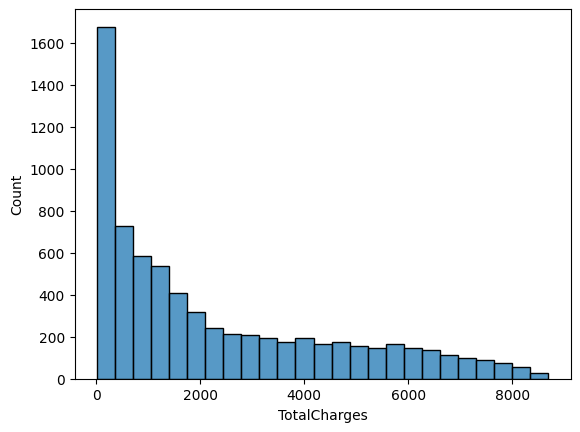

In [43]:
sns.histplot(df['TotalCharges'])

In [44]:
df_imputed = df.copy()

In [45]:
df_imputed.loc[:, 'TotalCharges'] = df_imputed['TotalCharges'].fillna(mean)

In [46]:
df_imputed[df_imputed["TotalCharges"].isna()].index

Index([], dtype='int64')

In [47]:
df_imputed.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
df_imputed.to_csv('c:\\Users\\Tenura Pinsara\\Desktop\\ML\\Zuu\\mini_p_00\\Advanced_Telco_Customer_Churn_Prediction\\data\\processed\\Churn_Missing_Value_Handled.csv',index=False)